In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv("loan_application_data.csv")
print(data.head())

   Applicant Income  Credit Score  Loan Amount Loan Status
0             35795           619        50113    Rejected
1             20860           742        79069    Rejected
2             96820           614        10249    Approved
3             74886           676        24201    Approved
4             26265           588        63576    Rejected


In [3]:
print(data.describe())

       Applicant Income  Credit Score   Loan Amount
count       1000.000000   1000.000000   1000.000000
mean       69402.992000    567.987000  51406.609000
std        29089.058729    158.143037  27513.655931
min        20055.000000    300.000000   5155.000000
25%        43561.500000    432.000000  27665.750000
50%        70339.500000    577.000000  51749.000000
75%        93807.250000    695.250000  74664.250000
max       119835.000000    849.000000  99986.000000


In [4]:
data['Loan Status'] = data['Loan Status'].map({'Rejected':0,'Approved':1})
print(data.head())

   Applicant Income  Credit Score  Loan Amount  Loan Status
0             35795           619        50113            0
1             20860           742        79069            0
2             96820           614        10249            1
3             74886           676        24201            1
4             26265           588        63576            0


In [5]:
X= data[['Applicant Income','Credit Score','Loan Amount']]
Y = data['Loan Status']


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = LogisticRegression()

model.fit(X_train_scaled,Y_train)

Y_pred = model.predict(X_test_scaled)

In [8]:
# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.94
Precision: 0.82
Recall: 0.67
F1-Score: 0.73


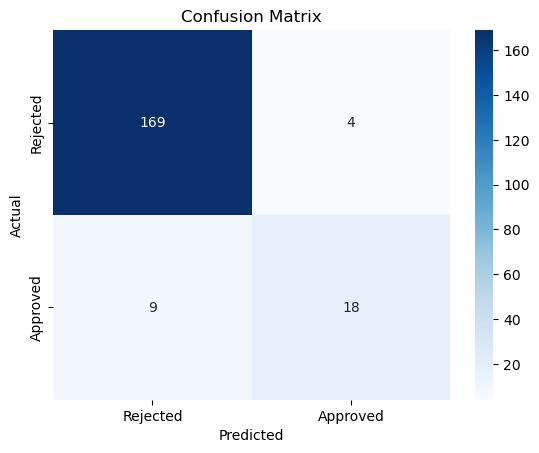

In [10]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

            Feature  Coefficient
0  Applicant Income     1.718906
1      Credit Score     2.556893
2       Loan Amount    -2.996138


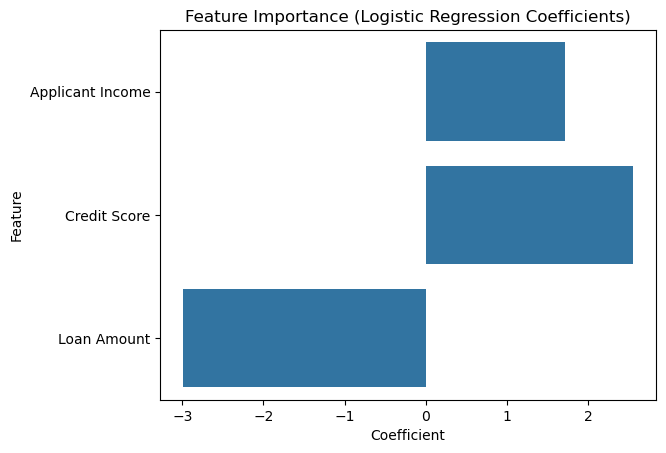

In [11]:
# Get the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df)

# Plot the coefficients
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

In [12]:
# Example: New loan application data
new_application = pd.DataFrame({
    'Applicant Income': [50000],
    'Credit Score': [700],
    'Loan Amount': [20000]
})

# Scale the new data using the same scaler
new_application_scaled = scaler.transform(new_application)

# Predict loan status
prediction = model.predict(new_application_scaled)
print("Loan Status:", "Approved" if prediction[0] == 1 else "Rejected")

Loan Status: Rejected


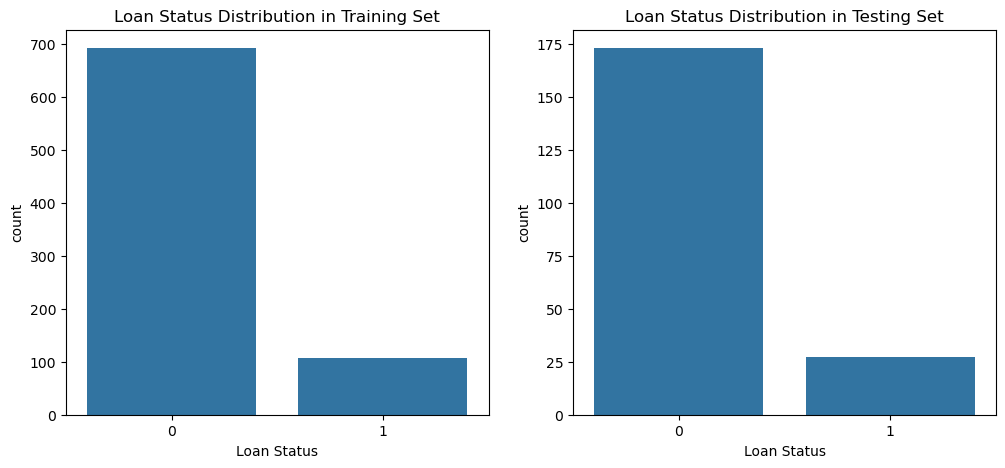

In [14]:
# Plotting the distribution of the target variable in training and testing sets
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=Y_train)
plt.title('Loan Status Distribution in Training Set')

plt.subplot(1, 2, 2)
sns.countplot(x=Y_test)
plt.title('Loan Status Distribution in Testing Set')

plt.show()